# January 30, 2022: intro to shap explanations

In [59]:
import numpy as np
import pandas as pd
import shap
import sklearn
import matplotlib.pyplot as plt

## linear model

In [2]:
X, y = shap.datasets.boston()
X100 = shap.utils.sample(X, 100)

# linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

LinearRegression()

In [4]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [5]:
for i in range(X.shape[1]):
    print(X.columns[i], '=', model.coef_[i].round(4))

CRIM = -0.108
ZN = 0.0464
INDUS = 0.0206
CHAS = 2.6867
NOX = -17.7666
RM = 3.8099
AGE = 0.0007
DIS = -1.4756
RAD = 0.306
TAX = -0.0123
PTRATIO = -0.9527
B = 0.0093
LSTAT = -0.5248


In [6]:
X100

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.06860,0.0,2.89,0.0,0.445,7.416,62.5,3.4952,2.0,276.0,18.0,396.90,6.19
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
121,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27


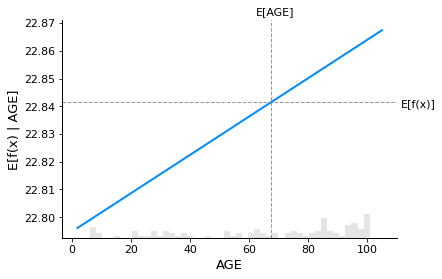

In [9]:
shap.plots.partial_dependence(6, model.predict, X100, ice=False,
                              model_expected_value=True, feature_expected_value=True)

In [47]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

Permutation explainer: 507it [00:16, 13.56it/s]                                                                                                               


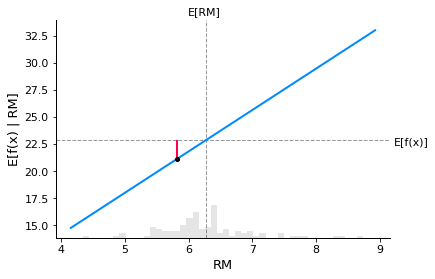

In [27]:
sample_inds = [23]
shap.plots.partial_dependence(5, model.predict, X100, 
                              model_expected_value=True, feature_expected_value=True, 
                              ice=False, 
                              shap_values=shap_values[sample_inds, :])

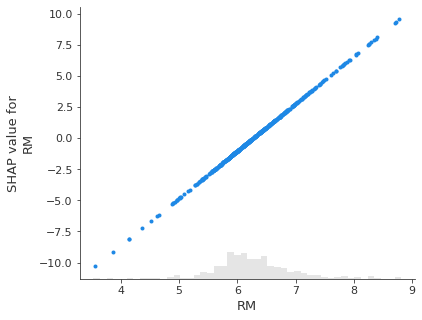

In [28]:
shap.plots.scatter(shap_values[:, 5])

In [29]:
print(model.predict(X)[sample_inds])
print(shap_values.base_values[sample_inds])

[13.80628535]
[22.84139551]


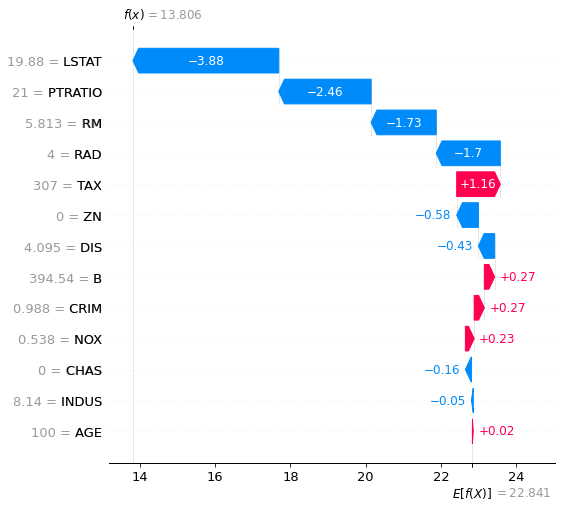

In [50]:
s = shap_values[sample_inds]
s.base_values = s.base_values[0]
s.values = s.values[0]
s.data = s.data[0]
shap.waterfall_plot(s, max_display=14)

In [49]:
shap_values[sample_inds]

.values =
array([[ 0.27053347, -0.57816681, -0.04899326, -0.16120403,  0.2343416 ,
        -1.73280289,  0.02262398, -0.4324488 , -1.7046956 ,  1.16117867,
        -2.45904061,  0.27436223, -3.88079811]])

.base_values =
array([22.84139551])

.data =
array([[  0.98843,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.813  ,
        100.     ,   4.0952 ,   4.     , 307.     ,  21.     , 394.54   ,
         19.88   ]])

## generalized additive regression model

In [54]:
# fit a GAM model to the data
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

Permutation explainer: 507it [00:36, 10.13it/s]                                                                                                               


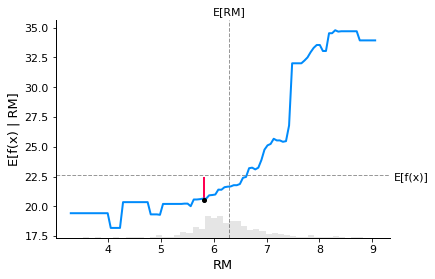

In [56]:
# make a standard partial dependence plot with a single SHAP value overlaid
shap.partial_dependence_plot(5, model_ebm.predict, X, 
                            model_expected_value=True, 
                            feature_expected_value=True, 
                            ice=False, 
                            shap_values=shap_values_ebm[sample_inds, :])

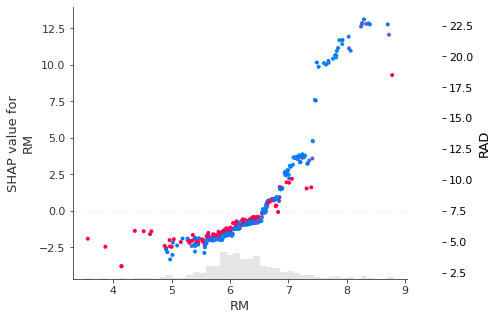

In [71]:
shap.plots.scatter(shap_values_ebm[:, 5], color=shap_values_ebm)

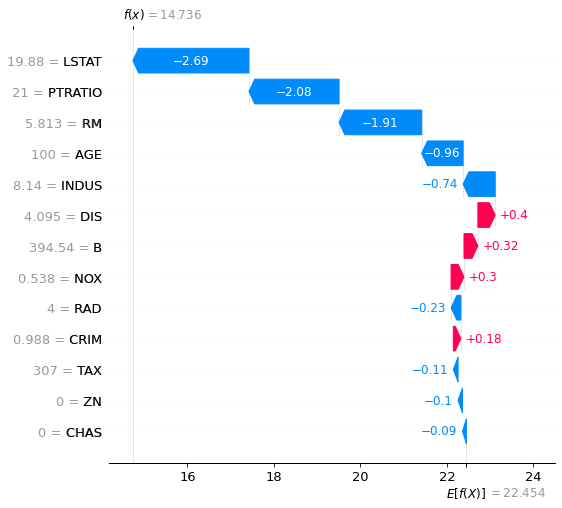

In [64]:
s = shap_values_ebm[sample_inds]
s.base_values = s.base_values[0]
s.values = s.values[0]
s.data = s.data[0]
shap.waterfall_plot(s, max_display=14)

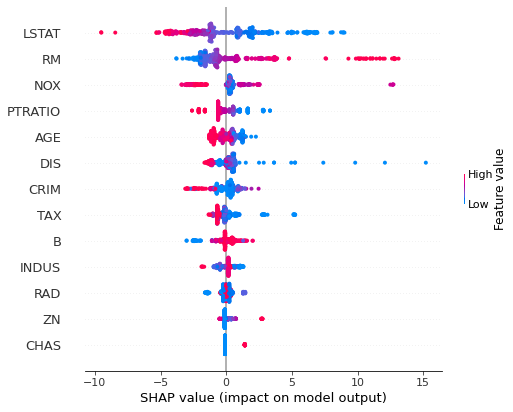

In [66]:
# ============================
# DID NOT UNDERSTAND THIS PLOT
# ============================
shap.plots.beeswarm(shap_values_ebm, max_display=14)

## non-additive boosted tree model

In [68]:
# train XGBoost model
import xgboost
model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


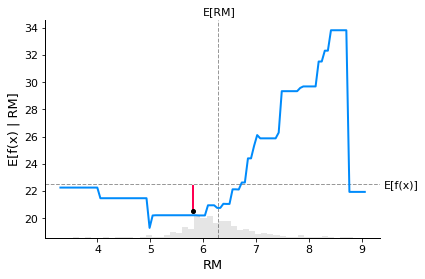

In [70]:
# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "RM", model_xgb.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_inds,:]
)

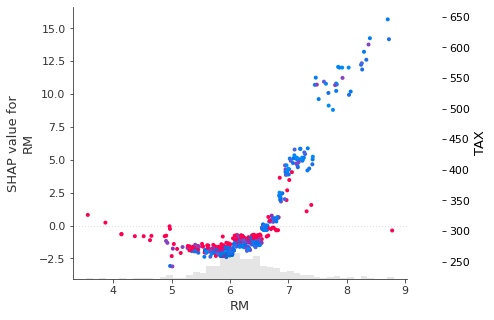

In [73]:
shap.plots.scatter(shap_values_xgb[:, 5], color=shap_values_xgb)

## linear logistic regression model

In [74]:
# a classic adult census dataset price dataset
X_adult,y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)
model_adult.fit(X_adult, y_adult)

LogisticRegression(max_iter=10000)

In [75]:
def model_adult_proba(x):
    return model_adult.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:,1] - p[:,0]

In [77]:
X_adult

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


In [78]:
y_adult

array([False, False, False, ..., False, False,  True])

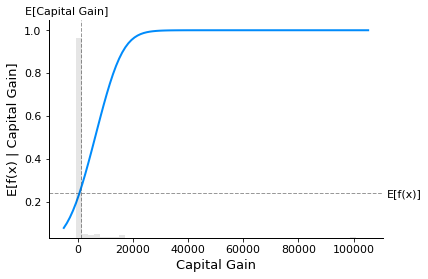

In [79]:
shap.partial_dependence_plot(8, model_adult_proba, X_adult, 
                             model_expected_value=True, 
                             feature_expected_value=True, ice=False)

In [83]:
background_adult = shap.utils.sample(X_adult, 100)
background_adult

explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X_adult[:1000])

Permutation explainer: 1001it [00:43, 17.49it/s]                                                                                                              


In [85]:
background_adult = shap.maskers.Independent(X_adult, max_samples=100)
background_adult

explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X_adult[:1000])

Permutation explainer: 1001it [00:34, 20.79it/s]                                                                                                              


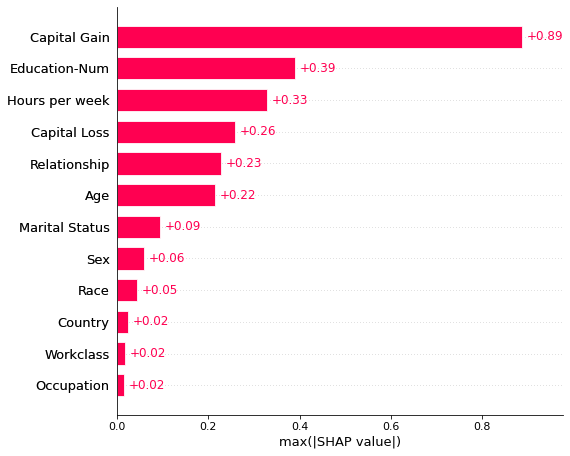

In [92]:
shap.plots.bar(shap_values_adult.abs.max(0), max_display=15)

In [102]:
shap_values.max(0)

.values =
array([0.3766125 , 4.06387903, 0.35395581, 2.52552979, 2.95263312,
       9.57106718, 0.02262398, 3.94349224, 4.41629398, 2.64132994,
       5.54403614, 0.2963378 , 5.64356645])

.base_values =
22.841395505733946

.data =
array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])

## non-additive boosted tree logistic regression model